# Import Data and Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv('C:/Users/Asus/Downloads/NT/Heart_Disease_Prediction.csv')

# Data Observation

In [4]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [6]:
data.describe(include = 'all')

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Absence
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,NaN
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,NaN
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,NaN
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,NaN
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,NaN
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,NaN


In [7]:
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [8]:
data.nunique()

Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

# Data Visualization

In [9]:
data.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [10]:
colm = ['Sex', 'Chest pain type','FBS over 120','EKG results','Exercise angina','Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']

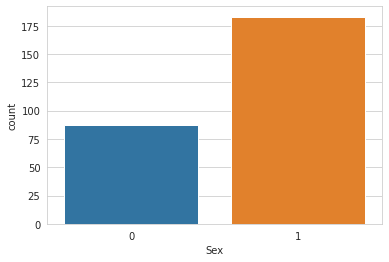

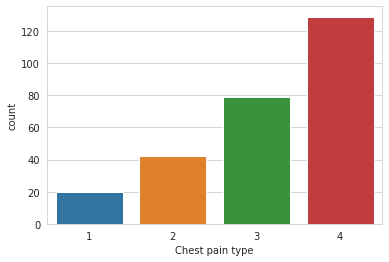

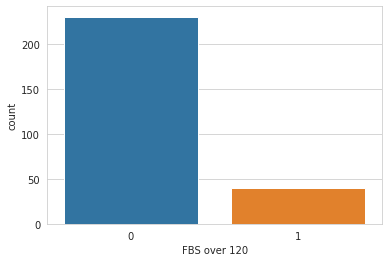

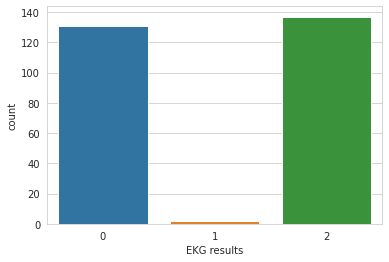

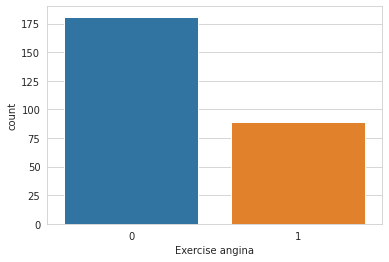

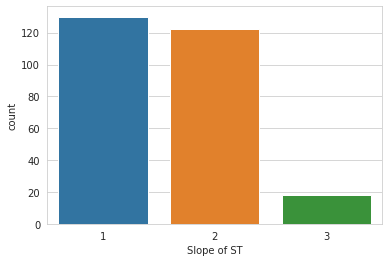

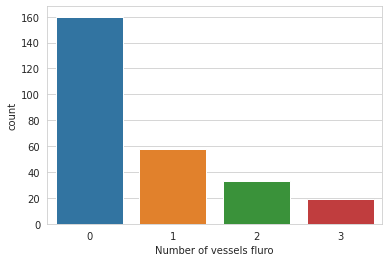

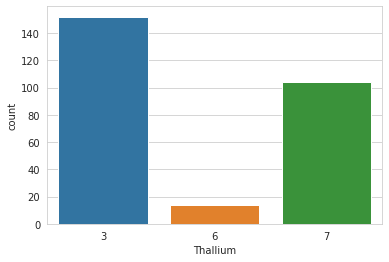

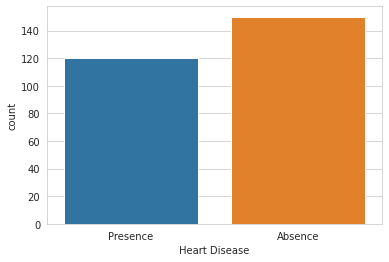

In [11]:
for col in colm:
  sns.countplot(data[col])
  plt.show()

<AxesSubplot:>

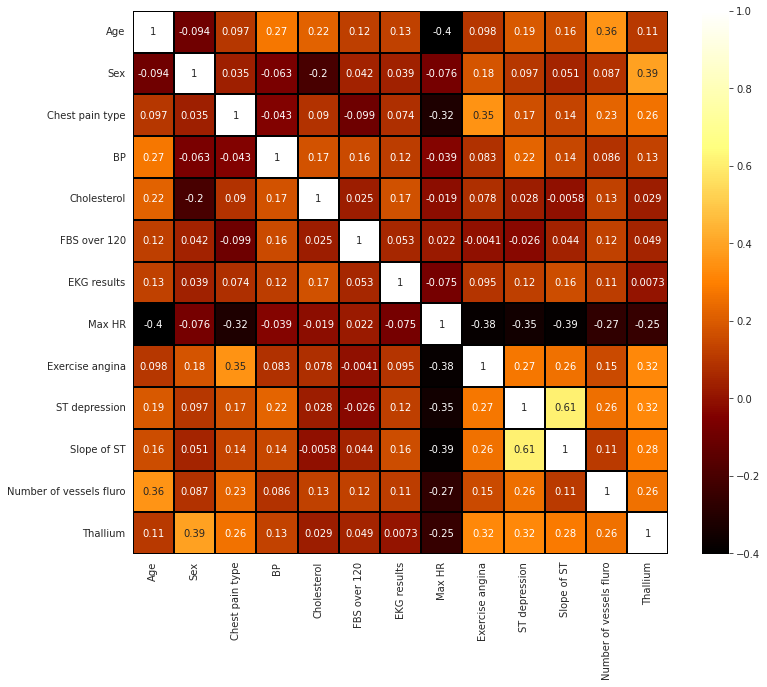

In [12]:
plt.figure(figsize=(12,10))
corr = data.corr()
sns.heatmap(corr, annot = True, linewidths= 0.2, linecolor= 'black', cmap = 'afmhot')

# Data Split and Scaling

In [13]:
data.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [14]:
X = data[['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium']]
y = data['Heart Disease']

In [15]:
print(X.shape,y.shape)

(270, 13) (270,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42529)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((162, 13), (108, 13), (162,), (108,))

**Converting y_train and y_test categories to 0's and 1's by replacing**

In [18]:
train_convert = {"Absence":0,"Presence":1}
y_train = y_train.replace(train_convert)

In [19]:
test_convert = {"Absence":0,"Presence":1}
y_test = y_test.replace(test_convert)

In [20]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.fit_transform(X_test)

# Random Forest

In [21]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
pred = rf.predict(X_test)

# Results

In [23]:
cm = confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        56
           1       0.78      0.83      0.80        52

    accuracy                           0.81       108
   macro avg       0.81      0.81      0.81       108
weighted avg       0.81      0.81      0.81       108



Text(0.5, 15.0, 'Predicted Values')

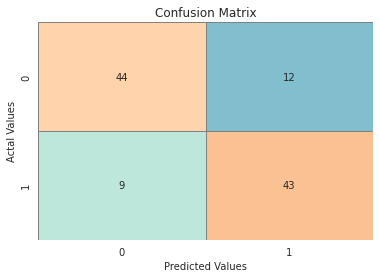

In [24]:
sns.heatmap(cm, annot = True, fmt = 'g', cbar = False, cmap = 'icefire', linewidths= 0.5, linecolor= 'grey')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')

In [25]:
print("Accuracy Score = {}".format(round(accuracy_score(y_test,pred),5)))

Accuracy Score = 0.80556
